In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/start.csv')

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62094 entries, 0 to 62093
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   date                         62094 non-null  datetime64[ns, UTC]
 1   weather_code                 62092 non-null  float64            
 2   temperature_2m_max           62092 non-null  float64            
 3   temperature_2m_min           62092 non-null  float64            
 4   temperature_2m_mean          62092 non-null  float64            
 5   apparent_temperature_max     62092 non-null  float64            
 6   apparent_temperature_min     62092 non-null  float64            
 7   apparent_temperature_mean    62092 non-null  float64            
 8   sunrise                      62094 non-null  int64              
 9   sunset                       62094 non-null  int64              
 10  daylight_duration            62094 non-null  f

In [6]:
df['month'] = df['date'].dt.month

def assign_month(month):
    if month in [12, 1, 2]:
        return 'winter'
    if month in [6, 7, 8]:
        return 'summer'
    else:
        return 'other'
    
df['season'] = df['month'].apply(assign_month)

df['year'] = None
df.loc[(df['month'] == 12), 'year'] = df['date'].dt.year + 1
df.loc[~df['month'].isin([12]), 'year'] = df['date'].dt.year




In [7]:
df_season = df[df['season'].isin(['winter', 'summer'])]

In [8]:
df[df['season'] == 'summer']

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,City,month,season,year
153,1940-06-01 23:00:00+00:00,51.0,17.569000,6.519000,12.360667,15.142868,4.932529,10.352726,0,0,...,7.0,16.485485,31.319998,57.396145,24.34,3.820267,Zurich,6,summer,1940
154,1940-06-02 23:00:00+00:00,1.0,20.319000,7.019000,14.241918,18.301315,4.557518,12.067585,0,0,...,0.0,19.803272,48.600000,55.971300,25.82,4.384602,Zurich,6,summer,1940
155,1940-06-03 23:00:00+00:00,0.0,21.469000,8.519000,15.664833,19.339369,6.031566,13.494321,0,0,...,0.0,22.104116,50.039997,54.773773,27.54,4.948923,Zurich,6,summer,1940
156,1940-06-04 23:00:00+00:00,1.0,23.669000,10.169001,17.606500,23.231497,7.637185,16.325434,0,0,...,0.0,19.008547,42.480000,53.514984,26.31,4.981433,Zurich,6,summer,1940
157,1940-06-05 23:00:00+00:00,1.0,23.919000,12.619000,18.325250,24.895329,10.480665,17.765710,0,0,...,0.0,16.279802,35.280000,51.749134,26.49,4.952008,Zurich,6,summer,1940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61968,2024-08-27 23:00:00+00:00,51.0,28.780500,11.230499,19.140915,29.395702,10.041389,19.113218,0,0,...,1.0,12.979984,37.440000,302.995600,17.61,3.726882,Seattle,8,summer,2024
61969,2024-08-28 23:00:00+00:00,63.0,23.180500,12.230499,15.840916,23.772345,10.756494,16.198431,0,0,...,10.0,13.276144,29.519999,320.792800,7.44,1.449533,Seattle,8,summer,2024
61970,2024-08-29 23:00:00+00:00,3.0,22.480500,9.180500,15.886750,19.996820,7.045993,13.809678,0,0,...,0.0,20.304129,47.880000,312.012000,19.93,3.948718,Seattle,8,summer,2024
61971,2024-08-30 23:00:00+00:00,63.0,20.780500,10.730499,14.397170,19.763617,8.963910,13.821937,0,0,...,15.0,13.896187,30.960001,41.168260,9.64,1.777441,Seattle,8,summer,2024


In [9]:
seasonal_stats = df_season.groupby(['City', 'season', 'year']).agg({
    'temperature_2m_mean': 'mean',
    'rain_sum': 'mean'
}).reset_index()

In [10]:
seasonal_stats[seasonal_stats['season'] == 'summer']
# df_season[df_season['season'] == 'summer']

,City,season,year,temperature_2m_mean,rain_sum
0,Seattle,summer,1940,17.482474,4.604348
1,Seattle,summer,1941,17.678330,4.776087
2,Seattle,summer,1942,19.453262,3.217391
3,Seattle,summer,1943,19.477583,3.015217
4,Seattle,summer,1944,21.049480,2.634783
...,...,...,...,...,...
251,Zurich,summer,2020,19.181605,4.871739
252,Zurich,summer,2021,18.578367,5.551087
253,Zurich,summer,2022,20.858236,3.542391
254,Zurich,summer,2023,20.473974,4.341304


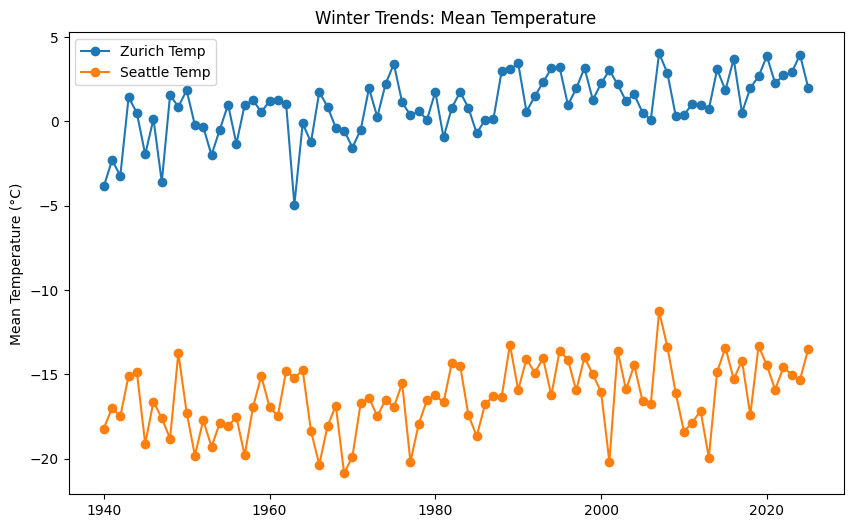

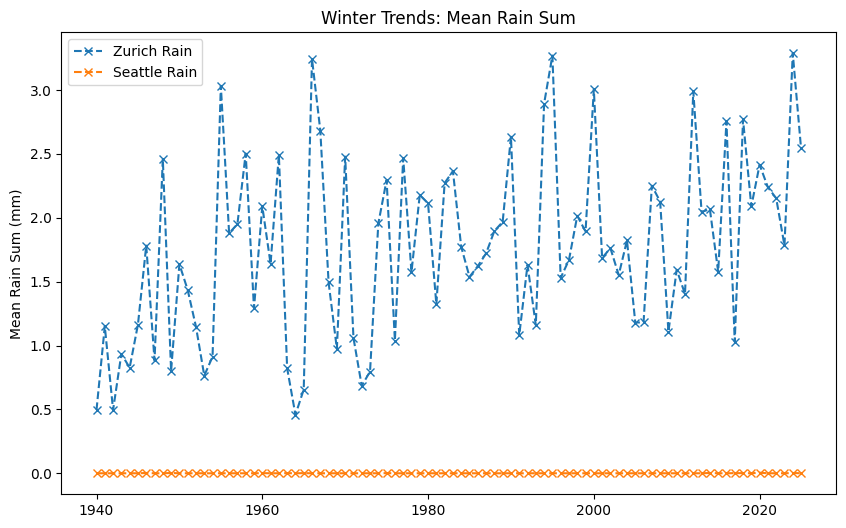

In [11]:
winter_stats = seasonal_stats[seasonal_stats['season'] == 'winter']

cities = ['Zurich', 'Seattle']
plt.figure(figsize=(10, 6))
for city in cities:
    city_data = winter_stats[winter_stats['City'] == city]
    plt.plot(city_data['year'], city_data['temperature_2m_mean'], marker = 'o', label = f'{city} Temp')
    

plt.title('Winter Trends: Mean Temperature')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for city in cities:
    city_data = winter_stats[winter_stats['City'] == city]
    plt.plot(city_data['year'], city_data['rain_sum'], marker = 'x', linestyle = '--', label = f'{city} Rain')
plt.title('Winter Trends: Mean Rain Sum')
plt.ylabel('Mean Rain Sum (mm)')
plt.legend()
plt.show()


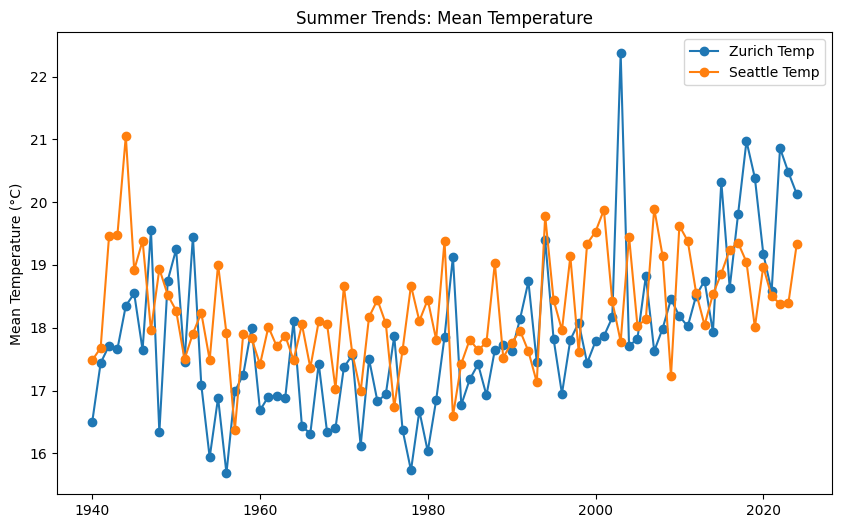

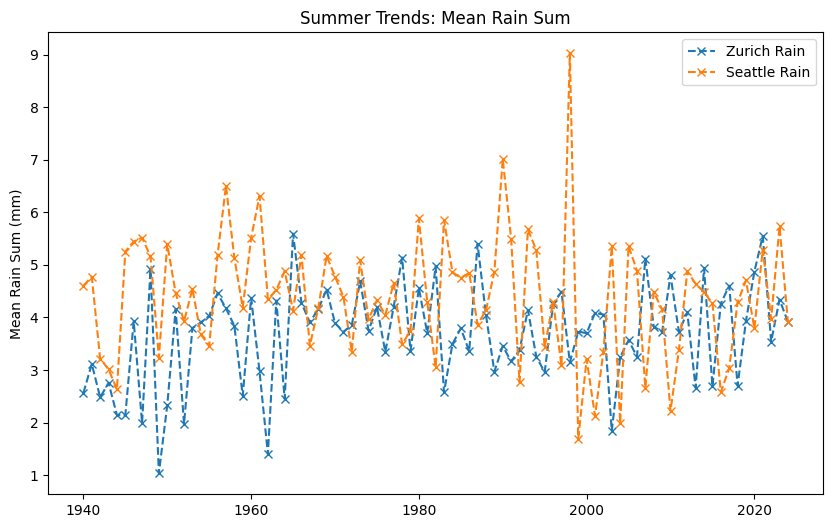

In [31]:
summer_stats = seasonal_stats[seasonal_stats['season'] == 'summer']

cities = ['Zurich', 'Seattle']
plt.figure(figsize=(10, 6))
for city in cities:
    city_data = summer_stats[summer_stats['City'] == city]
    plt.plot(city_data['year'], city_data['temperature_2m_mean'], marker = 'o', label = f'{city} Temp')
    

plt.title('Summer Trends: Mean Temperature')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for city in cities:
    city_data = summer_stats[summer_stats['City'] == city]
    plt.plot(city_data['year'], city_data['rain_sum'], marker = 'x', linestyle = '--', label = f'{city} Rain')
plt.title('Summer Trends: Mean Rain Sum')
plt.ylabel('Mean Rain Sum (mm)')
plt.legend()
plt.show()

In [12]:
winter_stats

,City,season,year,temperature_2m_mean,rain_sum
85,Seattle,winter,1940,-18.213014,0.000000
86,Seattle,winter,1941,-16.997250,0.000000
87,Seattle,winter,1942,-17.486162,0.000000
88,Seattle,winter,1943,-15.074704,0.000000
89,Seattle,winter,1944,-14.886494,0.000000
...,...,...,...,...,...
337,Zurich,winter,2021,2.253481,2.238889
338,Zurich,winter,2022,2.728921,2.153333
339,Zurich,winter,2023,2.895727,1.783333
340,Zurich,winter,2024,3.947517,3.287912


In [32]:
winter_stats['temperature_avg'] = winter_stats.groupby('City')['temperature_2m_mean'].transform('mean')
winter_stats['warmer_flag'] = np.where(winter_stats['temperature_2m_mean'] > winter_stats['temperature_avg'], 1, 0)

summer_stats['temperature_avg'] = summer_stats.groupby('City')['temperature_2m_mean'].transform('mean')
summer_stats['colder_flag'] = np.where(summer_stats['temperature_2m_mean'] < summer_stats['temperature_avg'], 1, 0)

C:\Users\nhatb\AppData\Local\Temp\ipykernel_7052\3758731241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_stats['temperature_avg'] = winter_stats.groupby('City')['temperature_2m_mean'].transform('mean')
C:\Users\nhatb\AppData\Local\Temp\ipykernel_7052\3758731241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_stats['warmer_flag'] = np.where(winter_stats['temperature_2m_mean'] > winter_stats['temperature_avg'], 1, 0)
C:\Users\nhatb\AppData\Local\Temp\ipykernel_7052\3758731241.py:4: Se

In [24]:
winter_stats

,City,season,year,temperature_2m_mean,rain_sum,temperature_avg,warmer_flag
85,Seattle,winter,1940,-18.213014,0.000000,-16.383348,0
86,Seattle,winter,1941,-16.997250,0.000000,-16.383348,0
87,Seattle,winter,1942,-17.486162,0.000000,-16.383348,0
88,Seattle,winter,1943,-15.074704,0.000000,-16.383348,1
89,Seattle,winter,1944,-14.886494,0.000000,-16.383348,1
...,...,...,...,...,...,...,...
337,Zurich,winter,2021,2.253481,2.238889,0.944352,1
338,Zurich,winter,2022,2.728921,2.153333,0.944352,1
339,Zurich,winter,2023,2.895727,1.783333,0.944352,1
340,Zurich,winter,2024,3.947517,3.287912,0.944352,1


In [33]:
summer_stats

,City,season,year,temperature_2m_mean,rain_sum,temperature_avg,colder_flag
0,Seattle,summer,1940,17.482474,4.604348,18.298076,1
1,Seattle,summer,1941,17.678330,4.776087,18.298076,1
2,Seattle,summer,1942,19.453262,3.217391,18.298076,0
3,Seattle,summer,1943,19.477583,3.015217,18.298076,0
4,Seattle,summer,1944,21.049480,2.634783,18.298076,0
...,...,...,...,...,...,...,...
251,Zurich,summer,2020,19.181605,4.871739,17.860513,0
252,Zurich,summer,2021,18.578367,5.551087,17.860513,0
253,Zurich,summer,2022,20.858236,3.542391,17.860513,0
254,Zurich,summer,2023,20.473974,4.341304,17.860513,0


In [34]:
corr_by_city = (
    winter_stats[winter_stats['warmer_flag'] == 1]
    .groupby('City')
    .apply(lambda x: x['temperature_2m_mean'].corr(x['rain_sum']))
)

C:\Users\nhatb\AppData\Local\Temp\ipykernel_7052\3933401322.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['temperature_2m_mean'].corr(x['rain_sum']))


In [35]:
corr_by_city

City
Seattle    0.045273
Zurich     0.296319
dtype: float64